<a href="https://colab.research.google.com/github/hyanquiv/CV-detection-topbottom/blob/master/transfer_learning_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!nvidia-smi

Sat Jul  5 23:48:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="CqVCYUbCvHjLl6bCMcMQ")
project = rf.workspace("clothing-jr7a4").project("clothing-detection-s4ioc")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Clothing-Detection-6 in yolov8:: 100%|██████████| 6200/6200 [00:00<00:00, 7386.35it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Actualizar YAML
#nc: 3
#names: [top, bottom, exposed]

In [ ]:
import os

# Rutas base y subdirectorios
base_dir = "/content/Clothing-Detection-6"
splits = ["train", "valid", "test"]

# Mapeo de clases originales a nuevas
# Formato: original_id : new_id
class_map = {
    0: 2,   # Exposed -> exposed
    4: 0,   # Hoodie -> top
    5: 0,   # Jacket -> top
    6: 1,   # Long Pants -> bottom
    7: 0,   # Long Shirt -> top
    8: 1,   # Long Skirt -> bottom
    10: 0,  # Shirt -> top
    11: 1,  # Short -> bottom
    12: 1,  # Short Skirt -> bottom
    13: 0   # SleevelessShirt -> top
}

for split in splits:
    label_dir = os.path.join(base_dir, split, "labels")
    print(f"Procesando: {label_dir}")
    for file_name in os.listdir(label_dir):
        path = os.path.join(label_dir, file_name)
        new_lines = []

        with open(path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    continue  # línea inválida

                class_id = int(parts[0])
                if class_id in class_map:
                    new_class = class_map[class_id]
                    new_line = f"{new_class} " + " ".join(parts[1:])
                    new_lines.append(new_line)

        # Guardar solo si hay detecciones válidas
        if new_lines:
            with open(path, "w") as f:
                f.write("\n".join(new_lines))
        else:
            os.remove(path)  # eliminar archivos sin detecciones útiles

Procesando: /content/Clothing-Detection-6/train/labels
Procesando: /content/Clothing-Detection-6/valid/labels
Procesando: /content/Clothing-Detection-6/test/labels


In [ ]:
from ultralytics import YOLO

# Cargar modelo base preentrenado
model = YOLO("yolov8n.pt")

# Entrenar con dataset
model.train(
    data="/content/Clothing-Detection-6/data.yaml",  # ruta al YAML
    epochs=50,
    imgsz=640,
    batch=8
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 286MB/s]


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Clothing-Detection-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 138MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 279MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 670.8±209.0 MB/s, size: 34.2 KB)


train: Scanning /content/Clothing-Detection-6/train/labels... 2546 images, 109 backgrounds, 0 corrupt: 100%|██████████| 2655/2655 [00:01<00:00, 2040.85it/s]


train: New cache created: /content/Clothing-Detection-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 672.2±255.3 MB/s, size: 50.9 KB)


val: Scanning /content/Clothing-Detection-6/valid/labels... 274 images, 9 backgrounds, 0 corrupt: 100%|██████████| 283/283 [00:00<00:00, 1085.28it/s]

val: New cache created: /content/Clothing-Detection-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 498. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.09G      1.066      2.033      1.433         23        640: 100%|██████████| 332/332 [01:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.19it/s]


                   all        283        498      0.737      0.417      0.461      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.34G       1.12      1.547      1.445         23        640: 100%|██████████| 332/332 [00:53<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.98it/s]

                   all        283        498      0.812       0.42      0.522      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.35G      1.139      1.383      1.441         17        640: 100%|██████████| 332/332 [00:54<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]

                   all        283        498      0.792      0.456      0.502      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.37G      1.112        1.3      1.427         20        640: 100%|██████████| 332/332 [00:54<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        283        498       0.67      0.651      0.674      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.39G      1.097      1.211      1.397         22        640: 100%|██████████| 332/332 [00:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.47it/s]

                   all        283        498      0.823       0.62      0.751      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.4G      1.061      1.142       1.38         23        640: 100%|██████████| 332/332 [00:56<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.08it/s]

                   all        283        498       0.67      0.707       0.74      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.42G      1.044      1.061      1.364         19        640: 100%|██████████| 332/332 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]

                   all        283        498      0.762      0.721       0.76      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.44G      1.011      1.001      1.348         27        640: 100%|██████████| 332/332 [00:54<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.20it/s]

                   all        283        498      0.742      0.741      0.773        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.46G     0.9842     0.9799      1.317         20        640: 100%|██████████| 332/332 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.02it/s]

                   all        283        498      0.842      0.656      0.772      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.47G     0.9625     0.9597      1.314         25        640: 100%|██████████| 332/332 [00:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.08it/s]

                   all        283        498      0.745      0.685      0.739       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.49G     0.9628      0.929      1.311         27        640: 100%|██████████| 332/332 [00:56<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.59it/s]

                   all        283        498      0.804      0.737      0.802      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.51G     0.9431     0.8985      1.291         17        640: 100%|██████████| 332/332 [00:55<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.11it/s]

                   all        283        498      0.844      0.715      0.791      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.52G     0.9251     0.8808      1.283         23        640: 100%|██████████| 332/332 [00:54<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.65it/s]

                   all        283        498      0.715      0.795      0.808      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.54G     0.9219     0.8599      1.279         18        640: 100%|██████████| 332/332 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.97it/s]

                   all        283        498      0.764      0.734      0.783      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.56G     0.8826     0.8087      1.256         24        640: 100%|██████████| 332/332 [00:54<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.11it/s]


                   all        283        498      0.793      0.785      0.822      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.58G     0.8769     0.7866      1.252         24        640: 100%|██████████| 332/332 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.75it/s]

                   all        283        498      0.794      0.751      0.816      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.59G     0.8951     0.7898      1.258         26        640: 100%|██████████| 332/332 [00:55<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.12it/s]

                   all        283        498      0.851      0.799      0.839      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.61G      0.872     0.7689      1.249         28        640: 100%|██████████| 332/332 [00:54<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

                   all        283        498      0.865      0.758      0.841       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.63G     0.8599     0.7461      1.232         24        640: 100%|██████████| 332/332 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]

                   all        283        498      0.849       0.75       0.84      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.64G     0.8461       0.73      1.226         13        640: 100%|██████████| 332/332 [00:54<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.69it/s]

                   all        283        498      0.709      0.752      0.798      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.66G      0.832     0.6994      1.214         23        640: 100%|██████████| 332/332 [00:53<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.12it/s]

                   all        283        498      0.844      0.745      0.832      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.68G     0.8282       0.71       1.21         24        640: 100%|██████████| 332/332 [00:55<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]

                   all        283        498      0.829        0.8      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.7G     0.8179     0.6939      1.213         18        640: 100%|██████████| 332/332 [00:56<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.99it/s]

                   all        283        498      0.842       0.78      0.848      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.71G     0.8203     0.6831      1.206         24        640: 100%|██████████| 332/332 [00:54<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.83it/s]

                   all        283        498      0.794      0.789      0.855      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.73G     0.8088      0.667      1.195         29        640: 100%|██████████| 332/332 [00:56<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.68it/s]

                   all        283        498      0.798      0.786      0.829      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.75G     0.7988     0.6441      1.191         18        640: 100%|██████████| 332/332 [00:54<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.16it/s]

                   all        283        498      0.844      0.815      0.858      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.76G        0.8     0.6465      1.188         23        640: 100%|██████████| 332/332 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]


                   all        283        498      0.827      0.846      0.879      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.78G     0.7911     0.6301      1.182         32        640: 100%|██████████| 332/332 [00:56<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.98it/s]

                   all        283        498      0.901      0.768      0.865      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.8G     0.7997      0.642      1.196         18        640: 100%|██████████| 332/332 [00:54<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        283        498       0.79      0.847       0.87      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.81G     0.7798     0.6178      1.179         15        640: 100%|██████████| 332/332 [00:56<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.69it/s]

                   all        283        498      0.934      0.762      0.865      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.83G     0.7682     0.6128      1.174         29        640: 100%|██████████| 332/332 [00:56<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.00it/s]

                   all        283        498      0.902      0.781      0.865      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.85G     0.7542     0.6064      1.165         23        640: 100%|██████████| 332/332 [00:54<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.37it/s]

                   all        283        498      0.912      0.783      0.864      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.87G     0.7545     0.5833      1.161         16        640: 100%|██████████| 332/332 [00:55<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.10it/s]

                   all        283        498      0.851        0.8      0.858      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.88G     0.7618     0.5823      1.168         25        640: 100%|██████████| 332/332 [00:55<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]

                   all        283        498      0.867      0.807      0.858      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.9G     0.7483     0.5645      1.157         32        640: 100%|██████████| 332/332 [00:54<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.96it/s]

                   all        283        498      0.862      0.817      0.868      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.92G      0.733     0.5572      1.152         26        640: 100%|██████████| 332/332 [00:55<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.07it/s]


                   all        283        498      0.867      0.811      0.863      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.93G     0.7376     0.5553      1.155         35        640: 100%|██████████| 332/332 [00:54<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.11it/s]

                   all        283        498      0.898      0.774      0.864      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.95G      0.721     0.5444      1.139         26        640: 100%|██████████| 332/332 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.12it/s]

                   all        283        498      0.884      0.805      0.856      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.97G     0.7081     0.5312      1.131         23        640: 100%|██████████| 332/332 [00:55<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]

                   all        283        498       0.89      0.817      0.867      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.98G     0.7053     0.5278      1.131         37        640: 100%|██████████| 332/332 [00:54<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.90it/s]

                   all        283        498      0.882      0.833       0.88      0.624


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         2G     0.5971     0.4059      1.103         20        640: 100%|██████████| 332/332 [00:54<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.14it/s]

                   all        283        498      0.874      0.851      0.876      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.02G     0.5843     0.3762        1.1         10        640: 100%|██████████| 332/332 [00:53<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.00it/s]

                   all        283        498       0.88      0.774      0.871      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.04G     0.5735      0.364       1.08         16        640: 100%|██████████| 332/332 [00:51<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]

                   all        283        498      0.869      0.815      0.859      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.05G     0.5482     0.3519      1.064          8        640: 100%|██████████| 332/332 [00:52<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.15it/s]

                   all        283        498      0.852      0.814      0.875      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.07G     0.5422     0.3384      1.061         14        640: 100%|██████████| 332/332 [00:51<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.84it/s]

                   all        283        498      0.873      0.804      0.871      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.09G     0.5331     0.3316      1.048         13        640: 100%|██████████| 332/332 [00:53<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]

                   all        283        498       0.86      0.796      0.871      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.11G     0.5192     0.3303       1.04          8        640: 100%|██████████| 332/332 [00:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.20it/s]

                   all        283        498      0.858      0.843       0.88      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.12G     0.5134     0.3188      1.032          9        640: 100%|██████████| 332/332 [00:52<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.11it/s]

                   all        283        498      0.865      0.804      0.867      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G     0.5097      0.315      1.033         11        640: 100%|██████████| 332/332 [00:53<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.97it/s]

                   all        283        498      0.851      0.816      0.872      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G     0.4975      0.309      1.029         17        640: 100%|██████████| 332/332 [00:51<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]

                   all        283        498      0.859      0.831      0.879      0.628



50 epochs completed in 0.801 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]


                   all        283        498      0.853      0.814      0.875      0.633
                   top        178        225      0.853      0.876      0.932      0.718
                bottom        185        239      0.848      0.891      0.929      0.702
               exposed         24         34      0.858      0.676      0.764      0.477
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0387d945d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

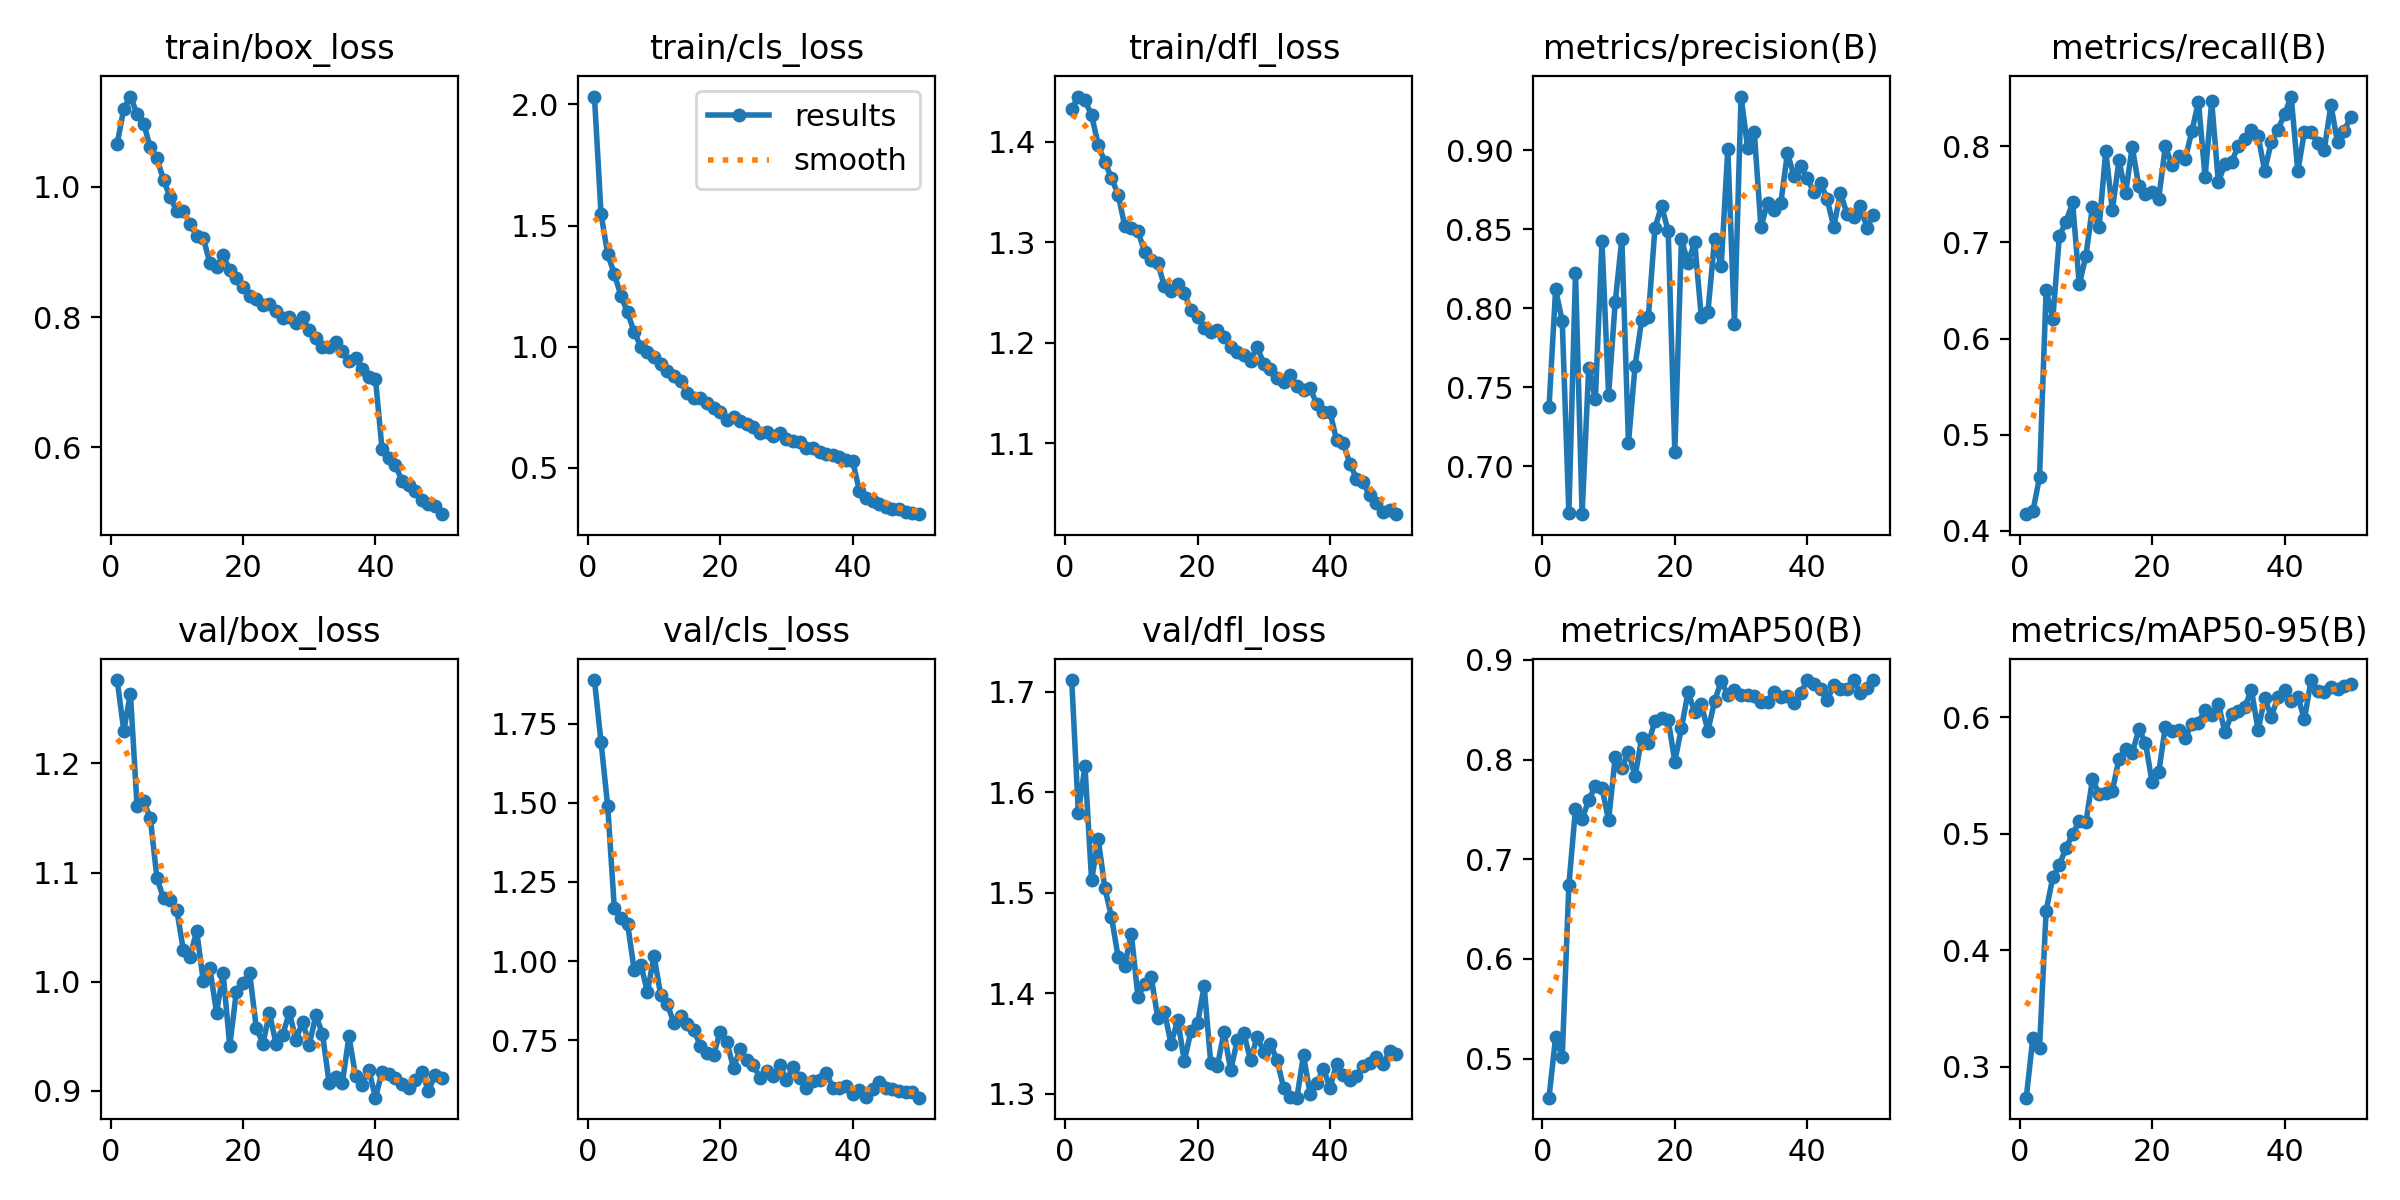

In [ ]:
# Mostrar resultados en Colab
from IPython.display import Image, display
display(Image(filename='runs/detect/train/results.png'))

In [ ]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Crear carpeta de destino
!mkdir -p /content/drive/MyDrive/YOLOv8/

# 3. Copiar el modelo entrenado
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/YOLOv8/mi_yolov8_modelo.pt

Mounted at /content/drive
